In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
def plot_results(scale):
    fig, ax = plt.subplots()
    x = np.linspace(0,np.pi*4)
    y = np.sin(x * scale)
    ax.plot(x,y)


In [7]:
dropdown = widgets.Dropdown(
    options={ scale: scale for scale in [ 'big', 'bigger', 'biggest'] },
    value='big',
    description='Select activity'
)

In [8]:
def redoPlot(value):
    if 'big':
        plot_results(0.1)
    else:
        plot_results(0.5)
dropdown.observe(redoPlot, 'value')

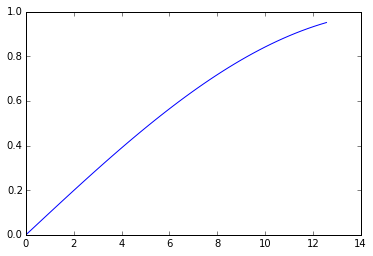

In [14]:
scales = {'big': 0.5,
          'small': 0.1}

@interact(scale=list(scales.keys()))
def display(scale):
    s = scales[scale]
    plot_results(s)



# Now with our data

In [118]:
import pandas as pd
import numpy as np
import datetime as dt

In [39]:
#data = pd.read_csv('data/vincent/merged/__016563_2014-08-08 12-02-19.bin_day1.csv', parse_dates=True, index_col='timestamp')
data = pd.read_csv('sensor3.csv', parse_dates=True, index_col='timestamp')
del data['delta']
print len(data)
data.head(5)

362872


,Activity,acceleration,anglex,angley,anglez,invalid
timestamp,,,,,,
2014-07-15 04:00:00,"WatchTV,DVDs,downloadedvideos",0.001139,-52.219093,31.982310,-17.932031,0
2014-07-15 04:00:05,"WatchTV,DVDs,downloadedvideos",0.001413,-52.169288,32.041719,-17.923120,0
2014-07-15 04:00:10,"WatchTV,DVDs,downloadedvideos",0.001318,-52.246065,31.960574,-17.920761,0
2014-07-15 04:00:15,"WatchTV,DVDs,downloadedvideos",0.001349,-52.181592,32.028817,-17.922608,0
2014-07-15 04:00:20,"WatchTV,DVDs,downloadedvideos",0.001737,-52.270592,31.950930,-17.894898,0


In [63]:
import string
from collections import Counter

def cleanup(s):
    printable = set(string.printable)
    return filter(lambda x: x in printable, s)

In [105]:
def mostCommonOption(activities):
    ctr = Counter(activities)
    top = ctr.most_common(n=1)[0][0]
    return top

reData = data.groupby(pd.TimeGrouper(freq='1D')).agg(
                {'acceleration': 'mean',
                 'anglex'      : 'mean',
                 'angley'      : 'mean',
                 'anglez'      : 'mean',
                 'Activity'    : mostCommonOption
                })
reData.head(5)

,acceleration,Activity,angley,anglex,anglez
timestamp,,,,,
2014-07-15,0.025902,PlayingelectronicgamesandApps,9.556991,23.262679,-1.862186
2014-07-16,0.019820,NaN,7.930317,-17.525756,-18.267083
2014-07-17,0.051900,"Didnothing,justrelaxing,bored,waiting",5.363760,-25.543220,-17.959707
2014-07-18,0.037831,Reading(notforschool),0.326157,-28.664980,-11.687376
2014-07-19,0.045504,NaN,3.722851,-20.252230,5.305554


In [155]:
def plot_results_bobby(activity, minAcc, res):
    fig, ax = plt.subplots(ncols=2,figsize=(20,8))
    
    resToFreq = {
            'hour'  : '1H',
            'day'   : '1D',
            'minute': '1Min'
        }
    resToWidth = {  # Width in days
            'hour'  : 1/24,
            'day'   : 1,
            'minute': 1/(24*60)
        }
    freq = resToFreq[res]
    widthInDays = resToWidth[res]
    
    myData = data.groupby(pd.TimeGrouper(freq=freq)).agg(
                {'acceleration': 'mean',
                 'anglex'      : 'mean',
                 'angley'      : 'mean',
                 'anglez'      : 'mean',
                 'Activity'    : mostCommonOption
                })
    
    if activity is not None:
        myData = myData[myData['Activity']==activity]

    myData = myData[myData['acceleration']>minAcc]

    t = myData.index
    acc = myData['acceleration']
    angX = myData['anglex']
    angY = myData['angley']
    angZ = myData['anglez']

    if len(myData)<100:
        ax[0].bar(t,acc,width=widthInDays)

        ax[1].bar(t,angX,width=widthInDays/3,color='r')
        ax[1].bar(t,angY,width=widthInDays/3,color='g')
        ax[1].bar(t,angZ,width=widthInDays/3,color='b')
    else:
        ax[0].plot(t,acc,'+')
        
        ax[1].plot(t,angX,'+')
        ax[1].plot(t,angY,'+')
        ax[1].plot(t,angZ,'+')


In [83]:
activities = data['Activity'].unique()
activities = { cleanup(activity): activity for activity in activities if activity is not np.nan }
activities['All'] = None

resolutions = {
    'Hour'  : 'hour',
    'Day'   : 'day',
    'Minute': 'minute'
}

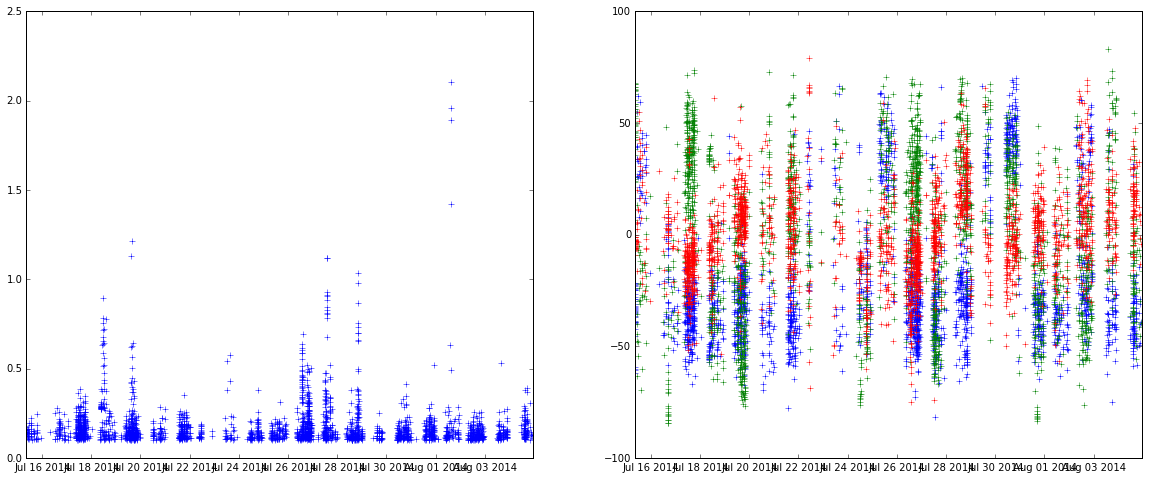

In [160]:
@interact(activitiy=list(activities.keys()), 
          minAcc=(0.0,4.0),
          resolution=list(resolutions.keys())
         )
def display(activitiy,minAcc,resolution):
    act = activities[activitiy]
    res = resolutions[resolution]
    plot_results_bobby(act,minAcc,res)